In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Synthetic data generation

### 1.1 Linear data

In [21]:
def true_fun(x, a=np.pi, b=0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    
    if f is None: f = lambda x: x

    x = np.sum([ai * np.power(x, i + 1) for i, ai in enumerate(a)], axis=0)

    return f(x + b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max = 1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)
    
    if random_x:
        x = np.sort(np.random.rand(N)) * x_max    
    else:
        x = np.linspace(0, x_max, N)
    
    y_true = np.array([])
    
    for f_ in np.append([], f):
        y_true = np.append(y_true, true_fun(x, a, b, f_))
    
    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

In [55]:
def visualize_data(y, y_true, x, title):
    fig = plt.figure(figsize=(10, 7))
    plt.scatter(x[:, 0], y, edgecolor = 'b', label = "Зашумленные Данные", s = 196, alpha = 0.6)
    plt.scatter(x[:, 0], y_true,label = "Реальные Данные", s = 81, c = 'g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=15)
    plt.title(title, fontsize=15)
    plt.xticks()
    plt.yticks();
    plt.tight_layout()
    plt.show()

#### 1.1.1

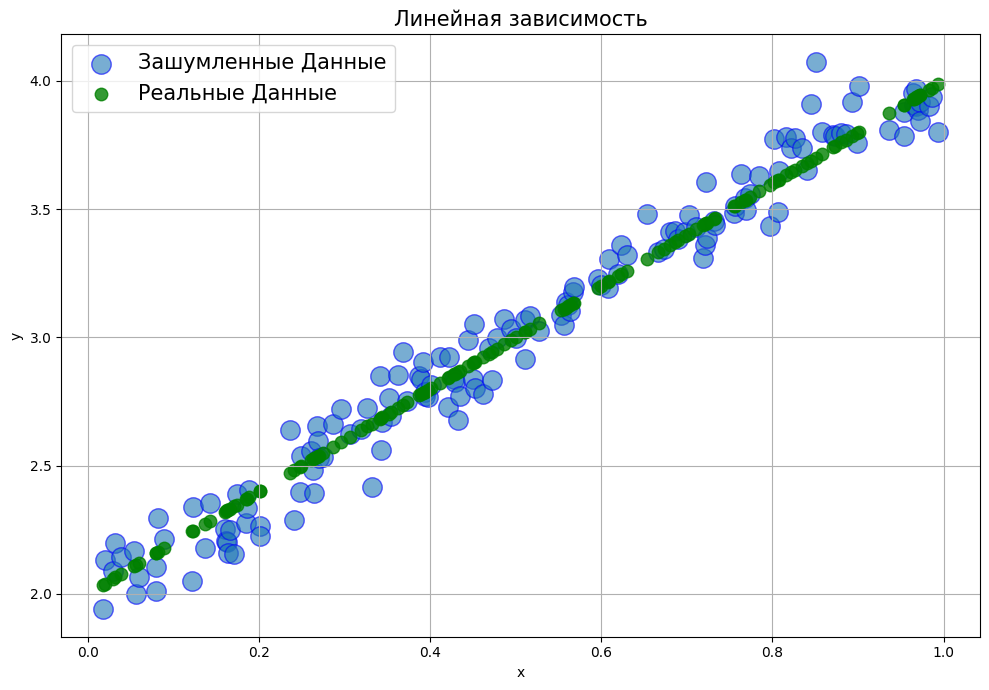

In [56]:
y, y_true_line, x = dataset(
    a=2,
    b=2,
    f=None,
    N=150,
    x_max=1,
    noise_power=0.1,
    seed=33
)

visualize_data(y, y_true_line, x, 'Линейная зависимость')

#### 1.1.2

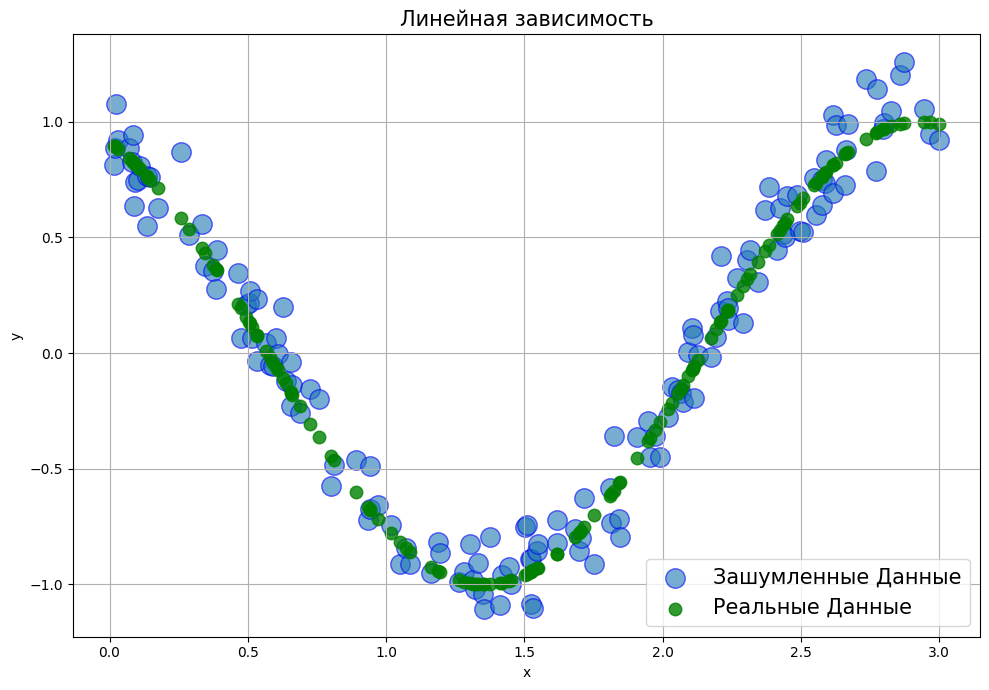

In [62]:
y, y_true_line, x = dataset(
    a=2,
    b=2,
    f=np.sin,
    N=150,
    x_max=3,
    noise_power=0.1,
    seed=22
)

visualize_data(y, y_true_line, x, 'Линейная зависимость')

#### 1.1.3


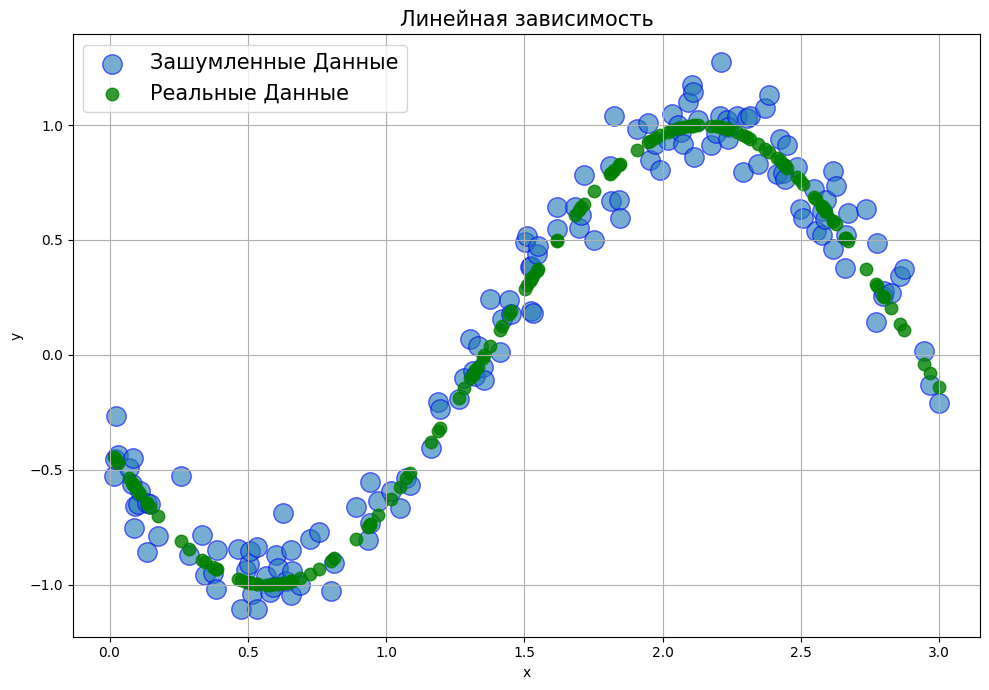

In [63]:
y, y_true_line, x = dataset(
    a=2,
    b=2,
    f=np.cos,
    N=150,
    x_max=3,
    noise_power=0.1,
    seed=22
)

visualize_data(y, y_true_line, x, 'Линейная зависимость')

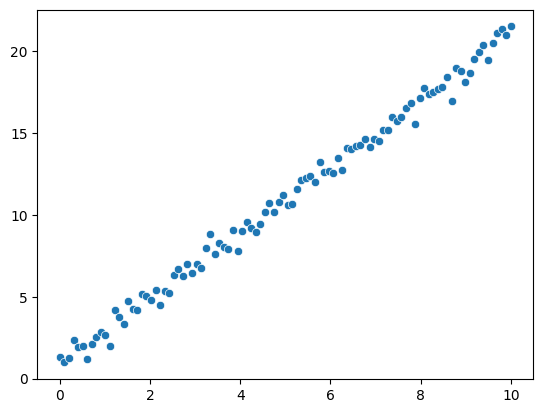

In [5]:
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 0.5, 100)

sns.scatterplot(x=x, y=y)
plt.show()

#### 1.1.4

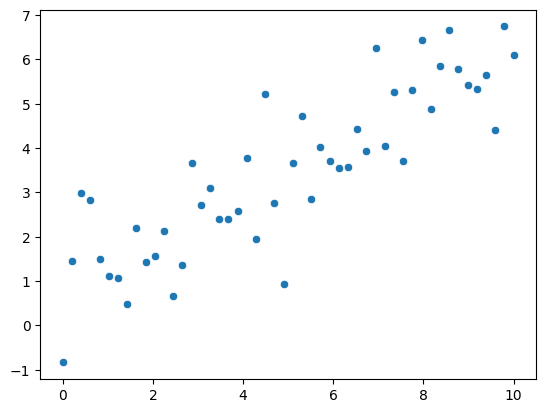

In [6]:
x = np.linspace(0, 10, 50)
y = 0.5 * x + 1 + np.random.normal(0, 1, 50)

sns.scatterplot(x=x, y=y)
plt.show()

### 1.2 polynomial data

#### 1.2.1

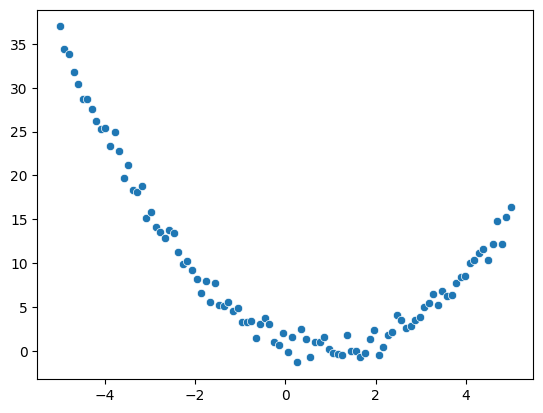

In [7]:
coefficients = [1, -2, 1]
x = np.linspace(-5, 5, 100)
y = np.polyval(coefficients, x) + np.random.normal(0, 1, 100)

sns.scatterplot(x=x, y=y)
plt.show()

#### 1.2.2

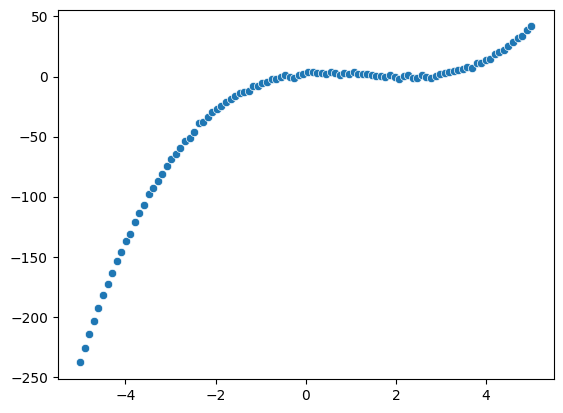

In [8]:
coefficients = [1, -4, 3, 2]
x = np.linspace(-5, 5, 100)
y = np.polyval(coefficients, x) + np.random.normal(0, 1, 100)

sns.scatterplot(x=x, y=y)
plt.show()

#### 1.2.3

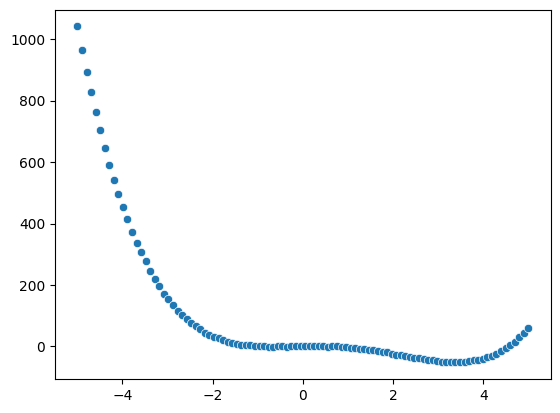

In [9]:
coefficients = [1, -4, -3, 2, 1]
x = np.linspace(-5, 5, 100)
y = np.polyval(coefficients, x) + np.random.normal(0, 1, 100)

sns.scatterplot(x=x, y=y)
plt.show()

### 1.3 Multi-variable data

#### 1.3.1

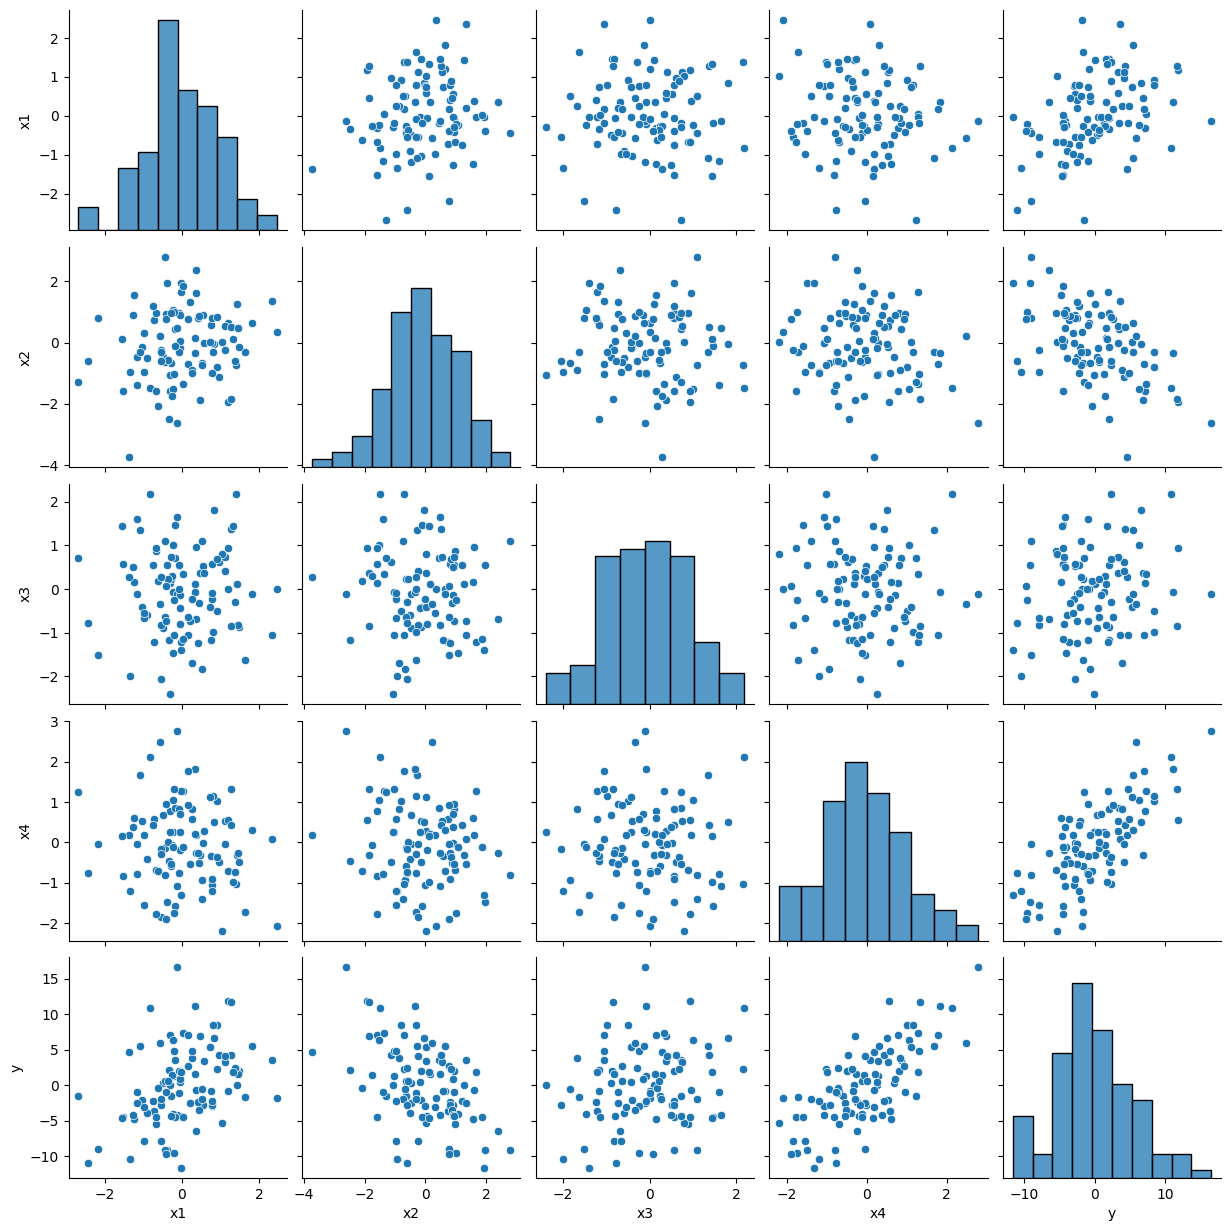

In [10]:
coefficients = [3, -2, 1, 4]
size = 100

x1 = np.random.normal(0, 1, size)
x2 = np.random.normal(0, 1, size)
x3 = np.random.normal(0, 1, size)
x4 = np.random.normal(0, 1, size)

y = np.dot(np.array([x1, x2, x3, x4]).T, coefficients) + np.random.normal(0, 1, 100)

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y})
sns.pairplot(df)

plt.show()

### 1.4 Time series data

### 1.4.1 

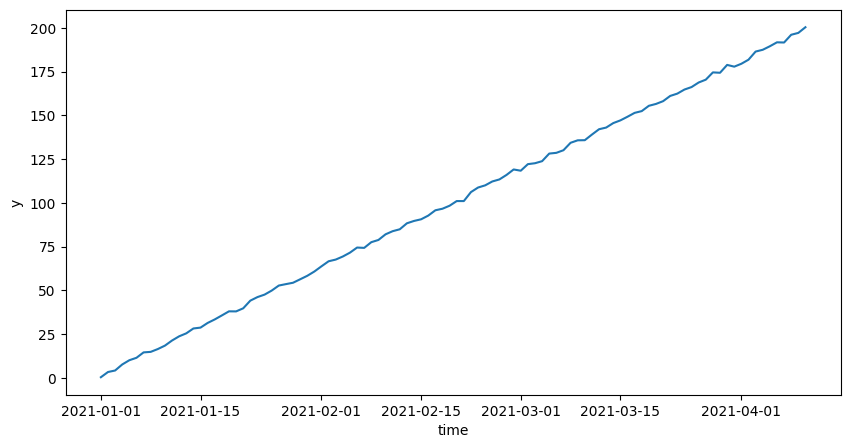

In [16]:
slope = 2
intercept = 1

time_series = pd.date_range(start='2021-01-01', periods=100, freq='D')

y = slope * np.arange(100) + intercept + np.random.normal(0, 1, 100)
df = pd.DataFrame({'time': time_series, 'y': y})

plt.figure(figsize=(10,5))
sns.lineplot(x=df['time'], y=df['y'])
plt.show()